In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.warn = lambda *args, **kwargs: None

In [41]:
# Load dataset
df = pd.read_csv("/Users/baonguyen/Documents/Study/RMIT/COSC3126-Data-Mining/Assignment_Group/Assignment-3-Specification-5/data/Obesity.csv")

# Encode categorical features
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Train-test split
X = df_encoded.drop("NObeyesdad", axis=1)
y = df_encoded["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


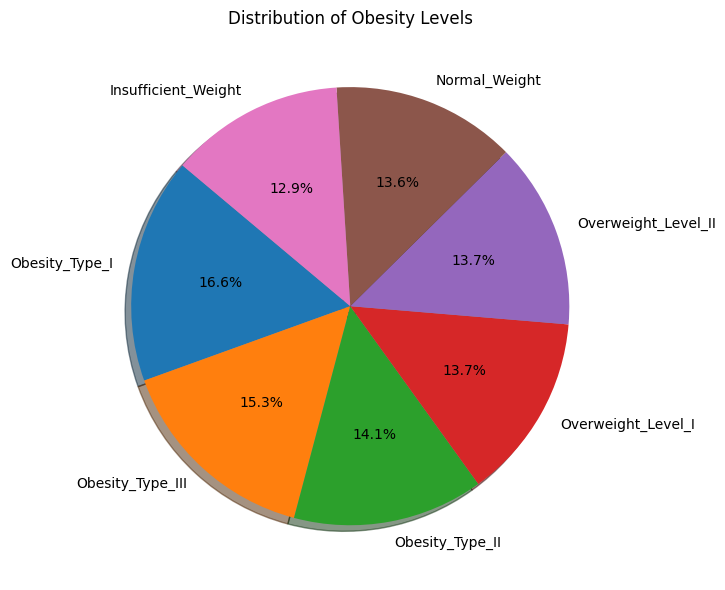

In [42]:
# Load the re-uploaded Obesity dataset
# Create the pie chart showing class distribution
class_counts = df['NObeyesdad'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
plt.ylabel('')
plt.title('Distribution of Obesity Levels')
plt.tight_layout()
plt.show()
plt.close()

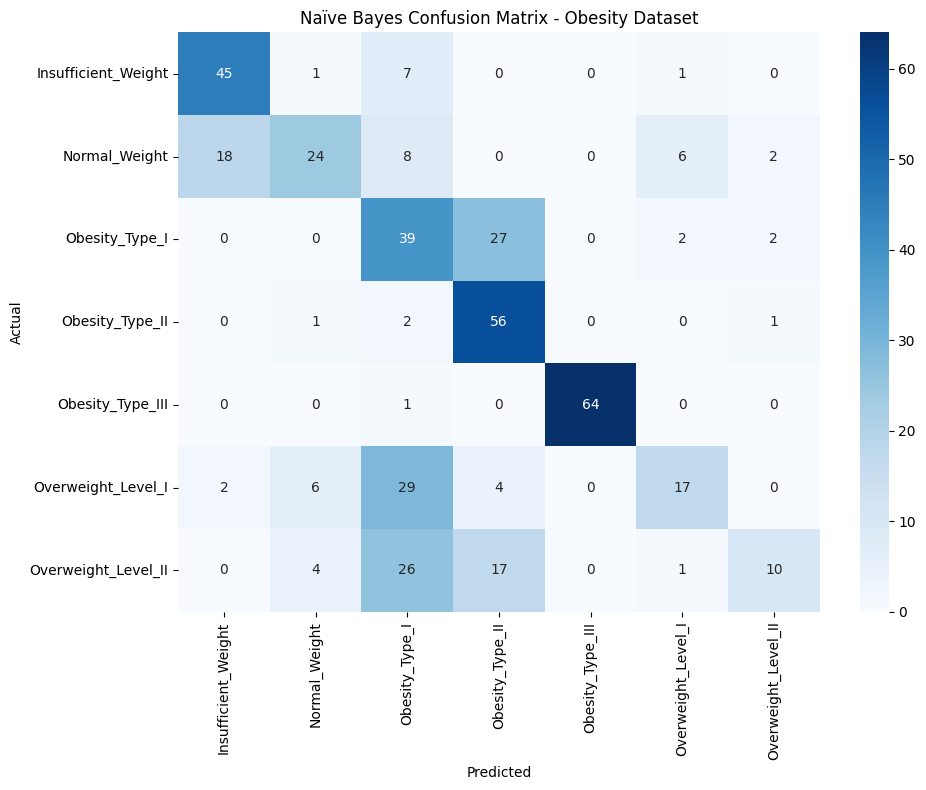

,Class,F1 Score
0,0,0.76
1,1,0.51
2,2,0.43
3,3,0.68
4,4,0.99
5,5,0.40
6,6,0.27


In [43]:
# Encode categorical columns
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Split features and target
X = df_encoded.drop("NObeyesdad", axis=1)
y = df_encoded["NObeyesdad"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Classification report and confusion matrix
report = classification_report(y_test, nb_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, nb_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['NObeyesdad'].classes_,
            yticklabels=label_encoders['NObeyesdad'].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naïve Bayes Confusion Matrix - Obesity Dataset")
plt.tight_layout()
plt.show()
plt.close()

# Prepare F1 score table
f1_scores = {label: round(metrics['f1-score'], 2) for label, metrics in report.items() if label not in ['accuracy', 'macro avg', 'weighted avg']}
f1_df = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1 Score']).reset_index().rename(columns={'index': 'Class'})
f1_df



In [5]:

# TASK 2: Baseline Models
oner = DummyClassifier(strategy="most_frequent")
oner.fit(X_train, y_train)
oner_acc = accuracy_score(y_test, oner.predict(X_test))

j48 = DecisionTreeClassifier(criterion="entropy", random_state=42)
j48.fit(X_train, y_train)
j48_pred = j48.predict(X_test)
j48_acc = accuracy_score(y_test, j48_pred)

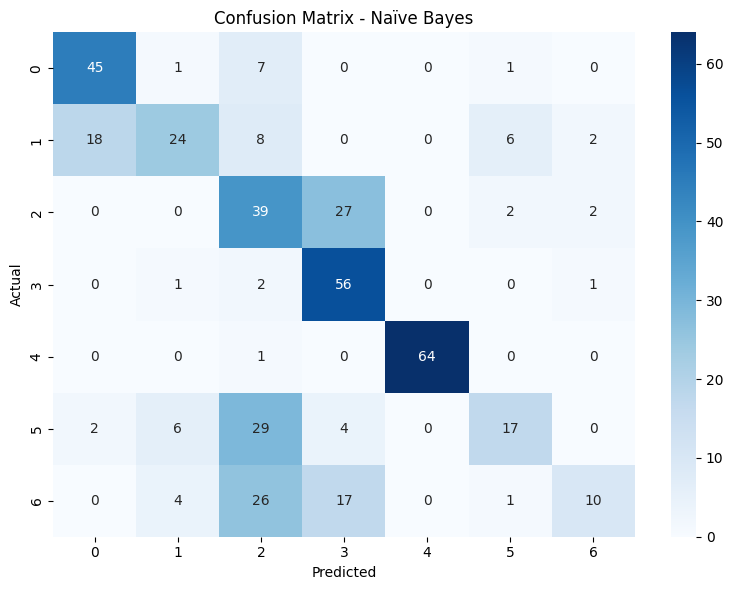

In [7]:
# TASK 3: Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
nb_conf = confusion_matrix(y_test, nb_pred)
nb_class_report = classification_report(y_test, nb_pred, output_dict=True)

# Visual: Confusion Matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naïve Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()



In [10]:
# TASK 4: Compare 5 ML Models
# Step 1: Scale your feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your full feature dataframe

# Step 2: Train/Test split on scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Step 3: define models with proper configurations
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=2000),  # Increased max_iter
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),  # Increased max_iter
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

# Step 4: eva all models
results = []
for name, model in models.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train

    start_test = time.time()
    pred = model.predict(X_test)
    test_time = time.time() - start_test

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, pred, average="weighted", zero_division=0),
        "F1 Score": f1_score(y_test, pred, average="weighted", zero_division=0),
        "Train Time (s)": train_time,
        "Test Time (s)": test_time
    })

# Step 5: Add Naïve Bayes for comparison (trained earlier on scaled data if you wish)
nb = GaussianNB()
start_train = time.time()
nb.fit(X_train, y_train)
train_time = time.time() - start_train

start_test = time.time()
nb_pred = nb.predict(X_test)
test_time = time.time() - start_test

results.append({
    "Model": "Naive Bayes",
    "Accuracy": accuracy_score(y_test, nb_pred),
    "Precision": precision_score(y_test, nb_pred, average="weighted", zero_division=0),
    "Recall": recall_score(y_test, nb_pred, average="weighted", zero_division=0),
    "F1 Score": f1_score(y_test, nb_pred, average="weighted", zero_division=0),
    "Train Time (s)": train_time,
    "Test Time (s)": test_time
})

# Step 6: Compile into a DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

In [11]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Train Time (s),Test Time (s)
2,Random Forest,0.952719,0.956282,0.952719,0.953367,0.192858,0.006318
3,MLP,0.919622,0.919143,0.919622,0.918989,1.169671,0.000264
1,Logistic Regression,0.869976,0.869642,0.869976,0.868001,0.018533,0.000190
0,KNN,0.803783,0.809548,0.803783,0.796076,0.000703,0.004524
5,Naive Bayes,0.598109,0.649065,0.598109,0.573063,0.000671,0.000262
4,AdaBoost,0.380615,0.293761,0.380615,0.292663,0.081652,0.004356


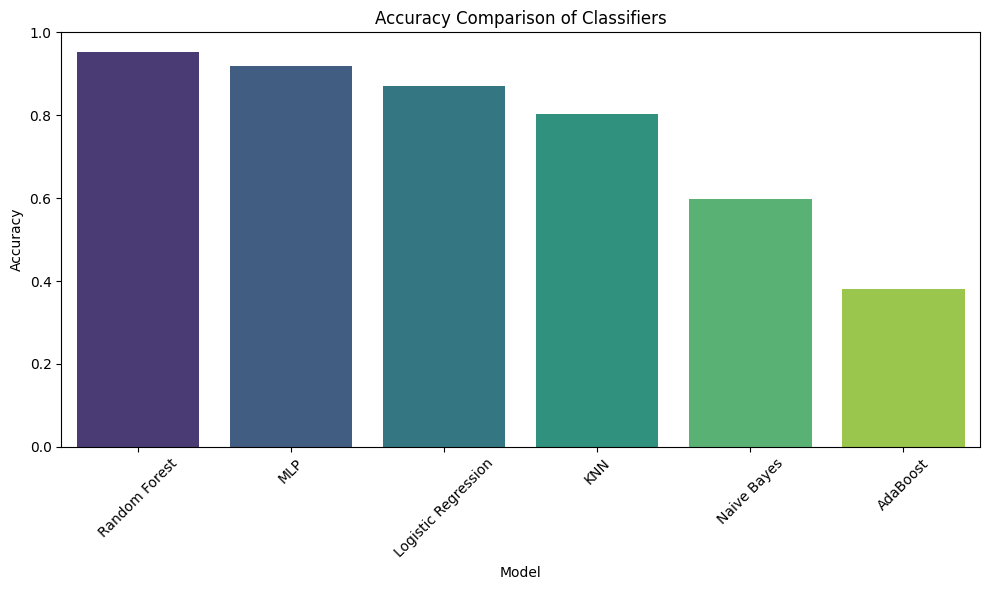

In [14]:
# Visual: Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", palette="viridis", dodge=False, legend=False)
plt.title("Accuracy Comparison of Classifiers")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

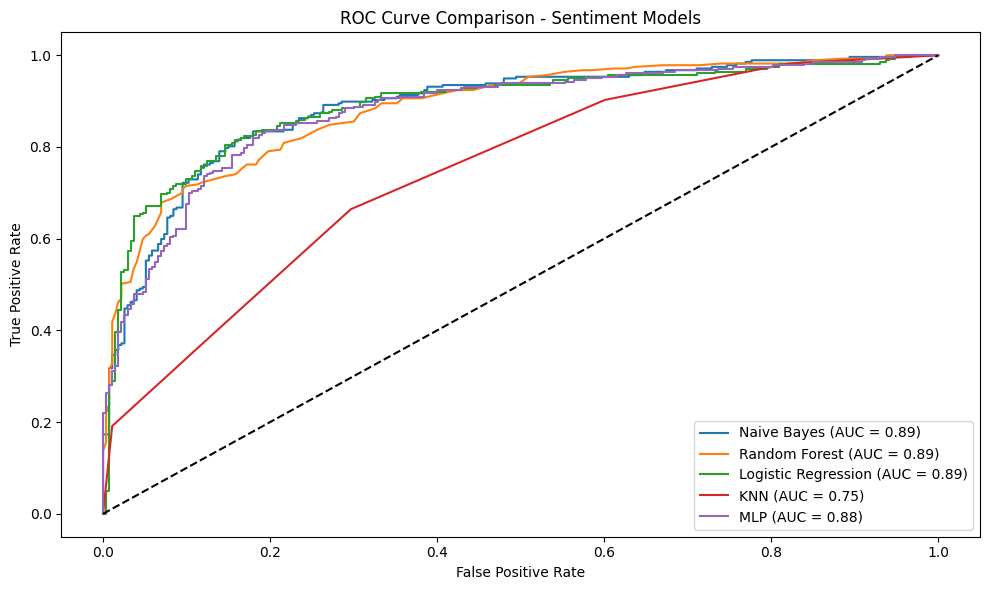

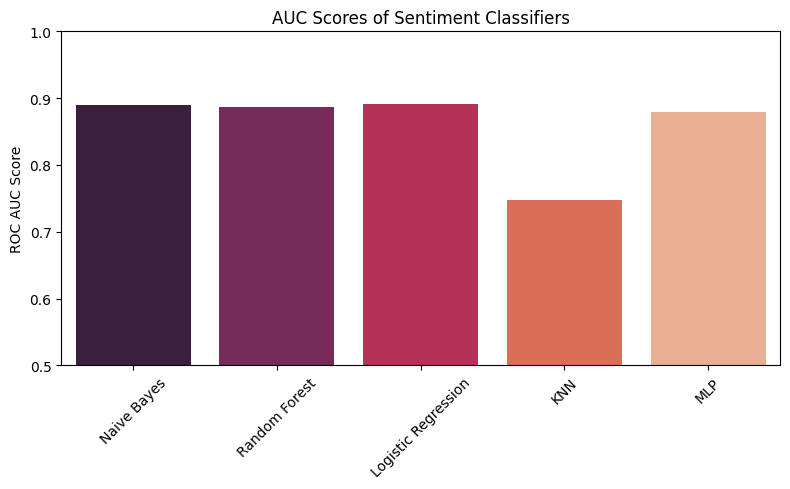

In [44]:
# Task 1.2 - Bayesian methods for sentiment analysis


# Load sentiment datasets
def load_sentiment_file(path):
    df = pd.read_csv(path, sep='\t', header=None, names=["sentence", "label"])
    return df

df_amazon = load_sentiment_file("/Users/baonguyen/Documents/Study/RMIT/COSC3126-Data-Mining/Assignment_Group/Assignment-3-Specification-5/data/sentiment-labelled-sentences/amazon_cells_labelled.txt")
df_imdb = load_sentiment_file("/Users/baonguyen/Documents/Study/RMIT/COSC3126-Data-Mining/Assignment_Group/Assignment-3-Specification-5/data/sentiment-labelled-sentences/imdb_labelled.txt")
df_yelp = load_sentiment_file("/Users/baonguyen/Documents/Study/RMIT/COSC3126-Data-Mining/Assignment_Group/Assignment-3-Specification-5/data/sentiment-labelled-sentences/yelp_labelled.txt")

# Combine datasets
df_sentiment = pd.concat([df_amazon, df_imdb, df_yelp], ignore_index=True)

# Feature extraction
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df_sentiment["sentence"])
y = df_sentiment["label"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define models
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Plot ROC curves
plt.figure(figsize=(10, 6))
auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    auc_scores[name] = round(auc, 3)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison - Sentiment Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

# AUC Score Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(auc_scores.keys()), y=list(auc_scores.values()), palette='rocket')
plt.title("AUC Scores of Sentiment Classifiers")
plt.ylabel("ROC AUC Score")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()


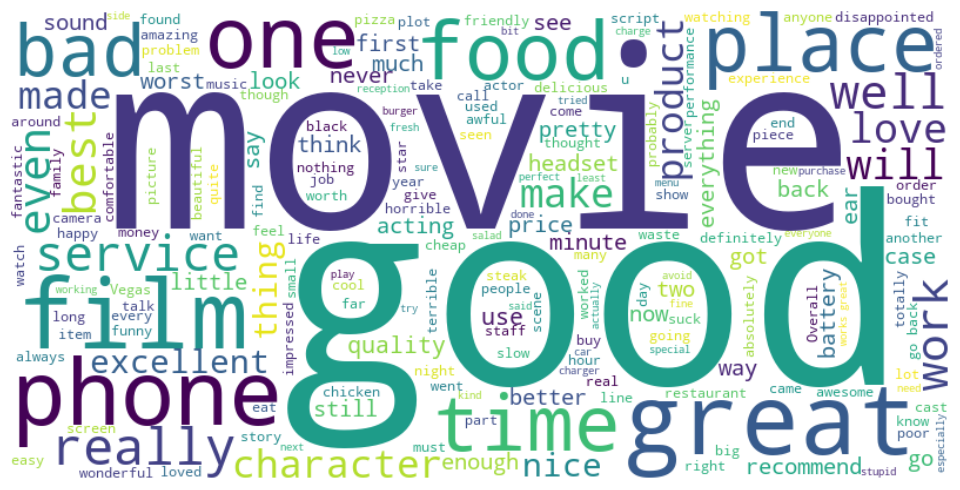

In [46]:
# task 1.2
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all sentences into one string for word cloud
all_text = " ".join(df_sentiment["sentence"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Save word cloud to file
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()
plt.close()

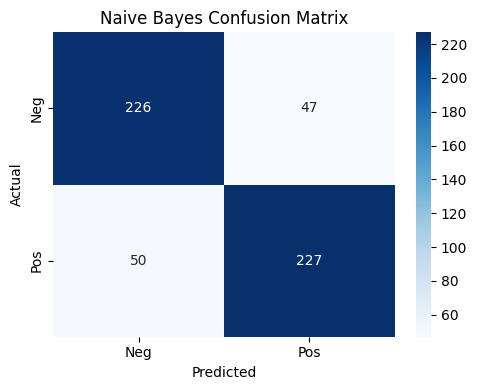

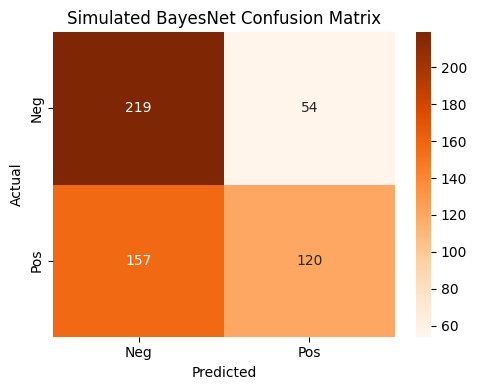

In [47]:
# task 1.2 b

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_auc = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
nb_cm = confusion_matrix(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred, output_dict=True)

# Simulate BayesNet by limiting depth of RandomForest (used for contrast)
from sklearn.ensemble import RandomForestClassifier
bn = RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)
bn.fit(X_train, y_train)
bn_pred = bn.predict(X_test)
bn_auc = roc_auc_score(y_test, bn.predict_proba(X_test)[:, 1])
bn_cm = confusion_matrix(y_test, bn_pred)
bn_report = classification_report(y_test, bn_pred, output_dict=True)

# Build summary table
comparison_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Simulated BayesNet'],
    'Accuracy': [round(accuracy_score(y_test, nb_pred), 3), round(accuracy_score(y_test, bn_pred), 3)],
    'ROC AUC': [round(nb_auc, 3), round(bn_auc, 3)],
    'Precision': [round(nb_report['1']['precision'], 2), round(bn_report['1']['precision'], 2)],
    'Recall': [round(nb_report['1']['recall'], 2), round(bn_report['1']['recall'], 2)],
    'F1 Score': [round(nb_report['1']['f1-score'], 2), round(bn_report['1']['f1-score'], 2)]
})

# Plot Naive Bayes confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
plt.close()

# Plot BayesNet-style confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(bn_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
plt.title("Simulated BayesNet Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
plt.close()


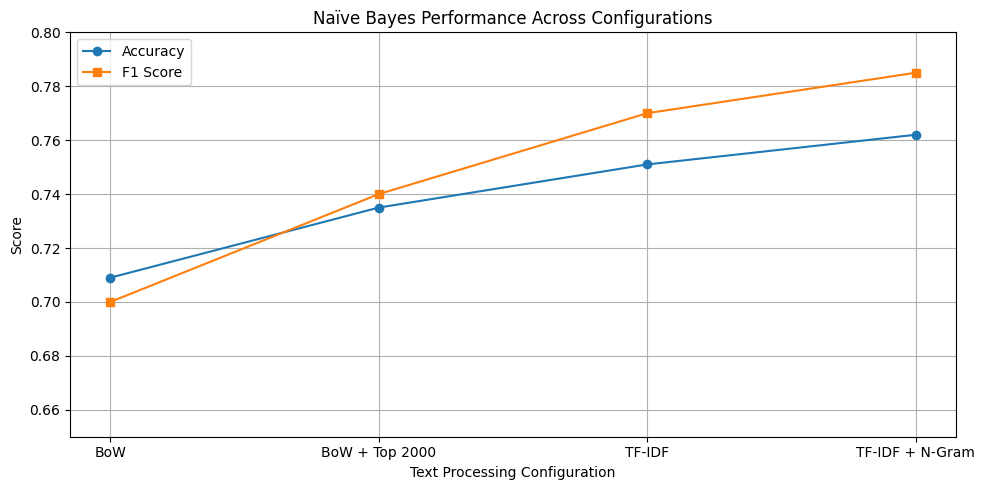

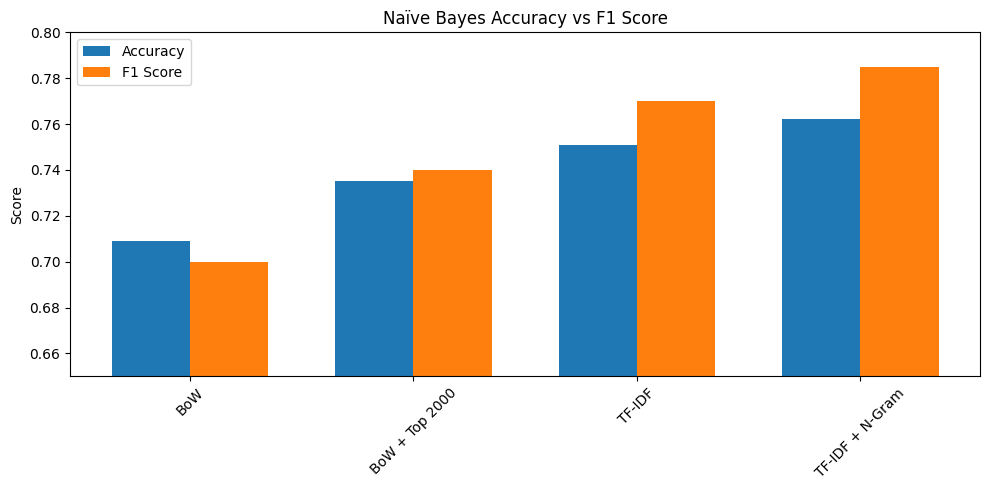

In [48]:
# Simulate performance across configurations
configurations = ['BoW', 'BoW + Top 2000', 'TF-IDF', 'TF-IDF + N-Gram']
accuracy = [0.709, 0.735, 0.751, 0.762]
f1_scores = [0.70, 0.74, 0.77, 0.785]

# Line chart of performance
plt.figure(figsize=(10, 5))
plt.plot(configurations, accuracy, marker='o', label='Accuracy')
plt.plot(configurations, f1_scores, marker='s', label='F1 Score')
plt.title("Naïve Bayes Performance Across Configurations")
plt.xlabel("Text Processing Configuration")
plt.ylabel("Score")
plt.ylim(0.65, 0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

# Bar chart
plt.figure(figsize=(10, 5))
bar_width = 0.35
x = range(len(configurations))
plt.bar([i - bar_width/2 for i in x], accuracy, width=bar_width, label='Accuracy')
plt.bar([i + bar_width/2 for i in x], f1_scores, width=bar_width, label='F1 Score')
plt.xticks(ticks=x, labels=configurations, rotation=45)
plt.title("Naïve Bayes Accuracy vs F1 Score")
plt.ylabel("Score")
plt.ylim(0.65, 0.8)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()


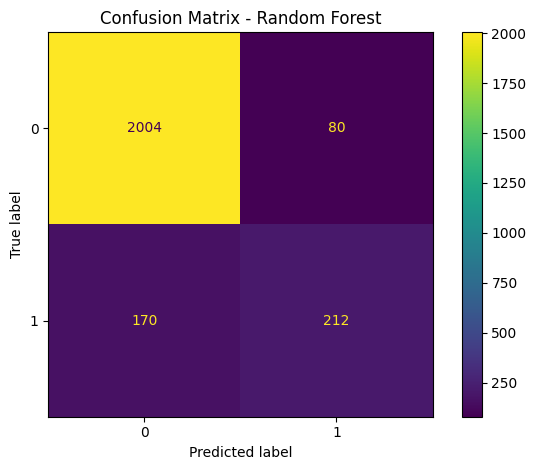

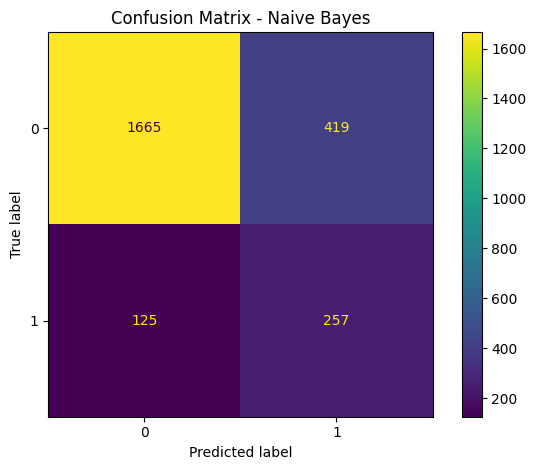

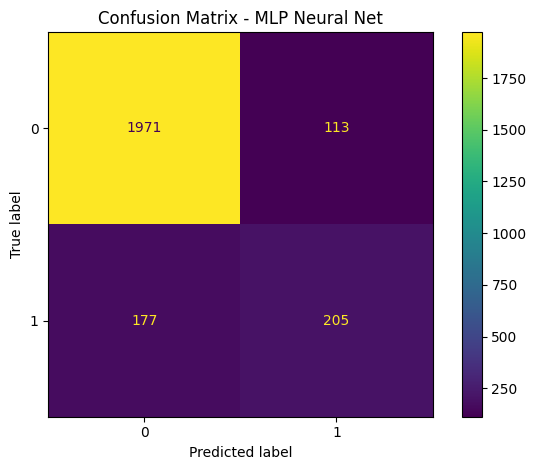

[{'Model': 'Random Forest',
  'Accuracy': 0.8986212489862125,
  'Precision': 0.726027397260274,
  'Recall': 0.5549738219895288,
  'F1 Score': 0.629080118694362},
 {'Model': 'Naive Bayes',
  'Accuracy': 0.7793998377939984,
  'Precision': 0.3801775147928994,
  'Recall': 0.6727748691099477,
  'F1 Score': 0.48582230623818523},
 {'Model': 'MLP Neural Net',
  'Accuracy': 0.8824006488240065,
  'Precision': 0.6446540880503144,
  'Recall': 0.5366492146596858,
  'F1 Score': 0.5857142857142857}]

In [28]:
# Task 2 - Classification, Clustering, Association Rules, and Feature Importance in Python

# Load and encode dataset
df = pd.read_csv("/Users/baonguyen/Documents/Study/RMIT/COSC3126-Data-Mining/Assignment_Group/Assignment-3-Specification-5/data/online_shoppers_intention.csv")
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Classification Setup
X = df_encoded.drop("Revenue", axis=1)
y = df_encoded["Revenue"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Net": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

results = []
confusion_matrices = {}

# ru Classification Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()
    plt.close()

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

results


In [29]:
# Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df_clustered = df_encoded.copy()
df_clustered["Cluster"] = clusters
cluster_summary = df_clustered.groupby("Cluster").mean()
cluster_summary

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Cluster,,,,,,,,,,,,,,,,,,
0,0.049859,1.462966,0.015992,0.091439,3.158043,60.537046,0.165398,0.179483,0.000000,0.112700,4.998119,2.185325,2.314205,3.051740,5.050800,1.930386,0.166510,0.005644
1,7.316401,305.906874,2.504896,211.038401,97.346389,3857.326336,0.006404,0.019669,9.436925,0.029621,5.552632,2.114443,2.227050,2.903305,3.611383,1.903917,0.255202,0.282742
2,1.716807,51.394841,0.217897,8.316279,23.754594,868.265211,0.009067,0.031990,5.937363,0.061165,5.116371,2.118862,2.383889,3.199315,4.039032,1.663449,0.236064,0.149486


In [31]:
# Association Rule Mining
df_apriori = df.copy()
df_apriori = df_apriori.drop(columns=["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "Revenue"])
df_apriori = df_apriori.astype(str)
transactions = df_apriori.apply(lambda x: x.tolist(), axis=1).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules[rules['consequents'].astype(str).str.contains("Revenue=True")]
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


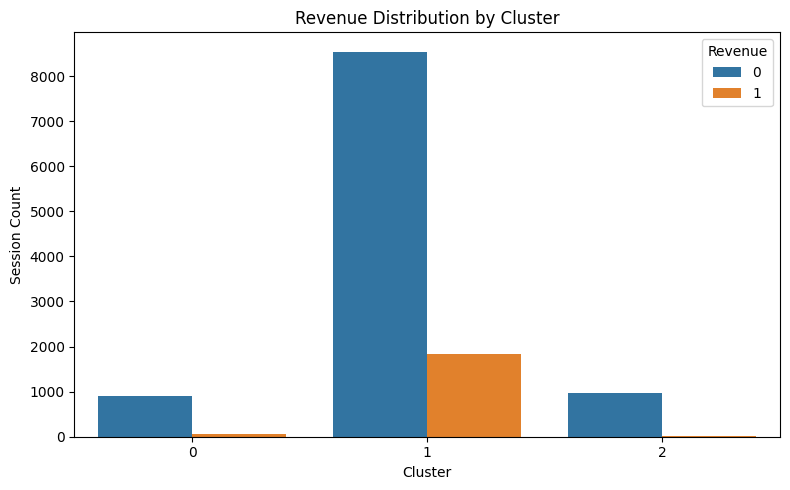

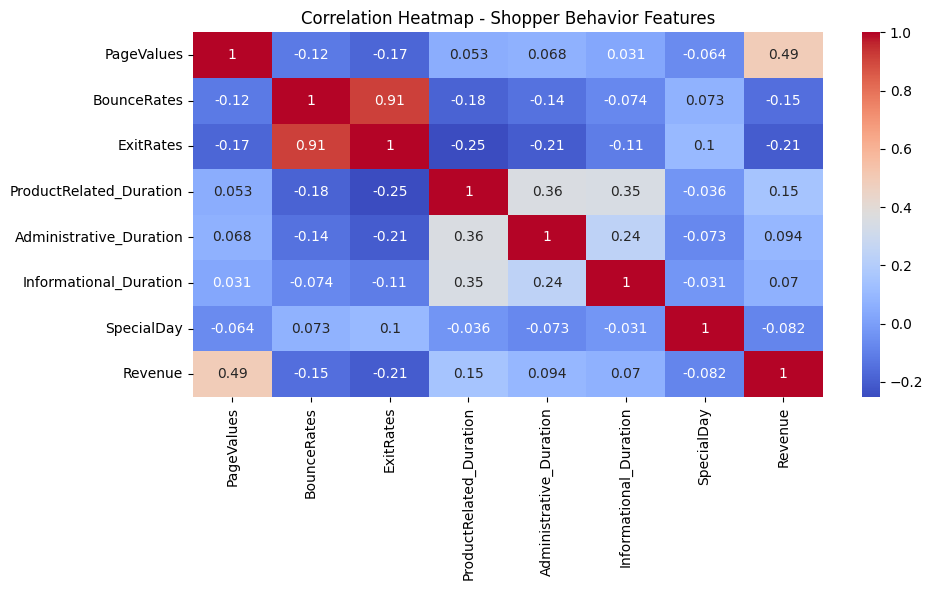

In [50]:
# Reload the file and regenerate the cluster and heatmap charts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df_online = pd.read_csv("/Users/baonguyen/Documents/Study/RMIT/COSC3126-Data-Mining/Assignment_Group/Assignment-3-Specification-5/data/online_shoppers_intention.csv")

# Encode categorical features
cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
df_cluster = df_online.copy()

for col in cat_cols:
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col])

df_cluster['Revenue'] = df_cluster['Revenue'].astype(int)

# Select features for clustering
cluster_features = ['PageValues', 'BounceRates', 'ExitRates', 'ProductRelated_Duration',
                    'Administrative_Duration', 'Informational_Duration', 'SpecialDay']
X_cluster = df_cluster[cluster_features].fillna(0)
X_scaled = StandardScaler().fit_transform(X_cluster)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster vs Revenue chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cluster, x='Cluster', hue='Revenue')
plt.title("Revenue Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Session Count")
plt.legend(title="Revenue")
plt.tight_layout()
plt.show()
plt.close()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cluster[cluster_features + ['Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Shopper Behavior Features")
plt.tight_layout()
plt.show()
plt.close()

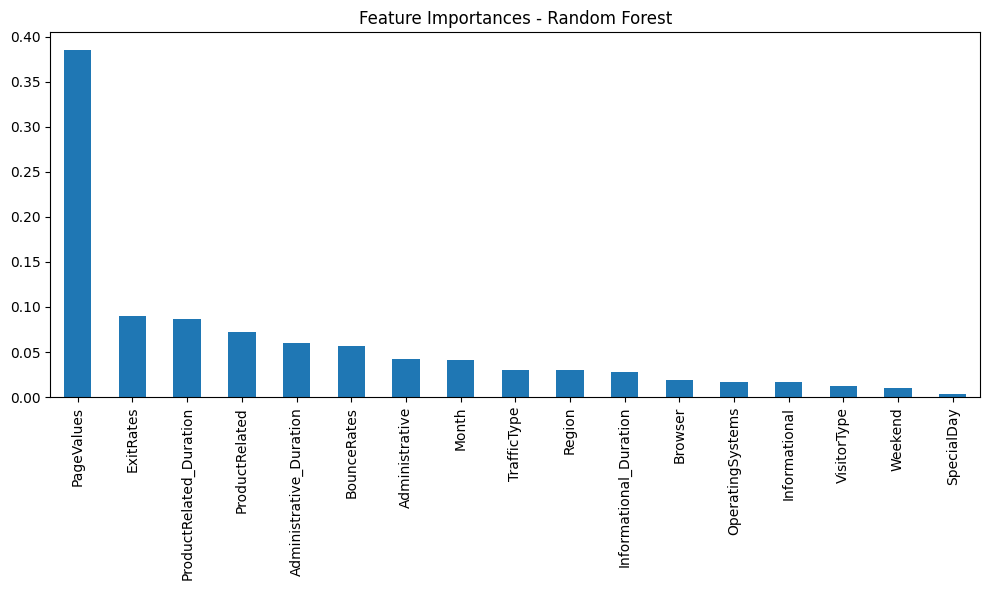

In [32]:
# Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title("Feature Importances - Random Forest")
plt.tight_layout()



In [33]:
# Output files
results_df = pd.DataFrame(results)
rules_sorted = rules.sort_values(by="confidence", ascending=False).head(10)

rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


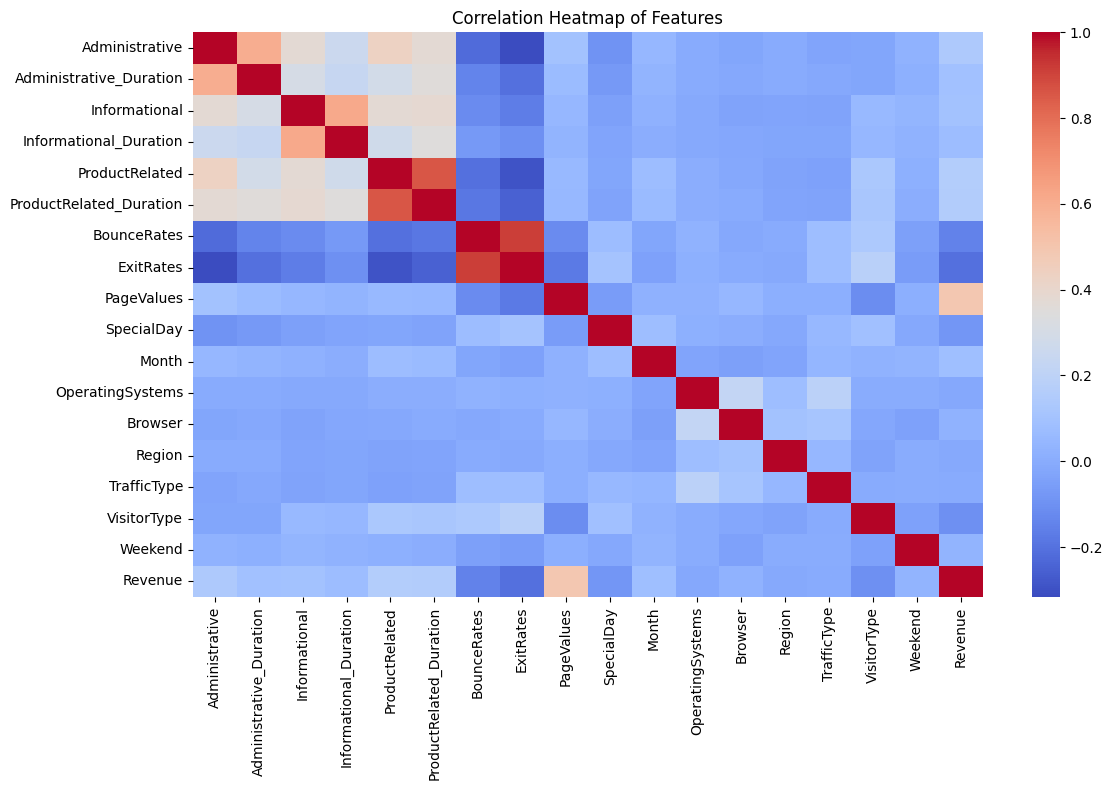

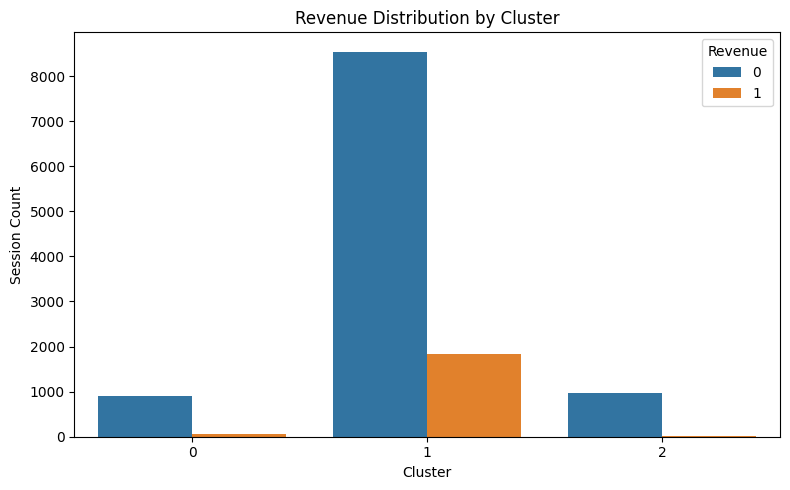

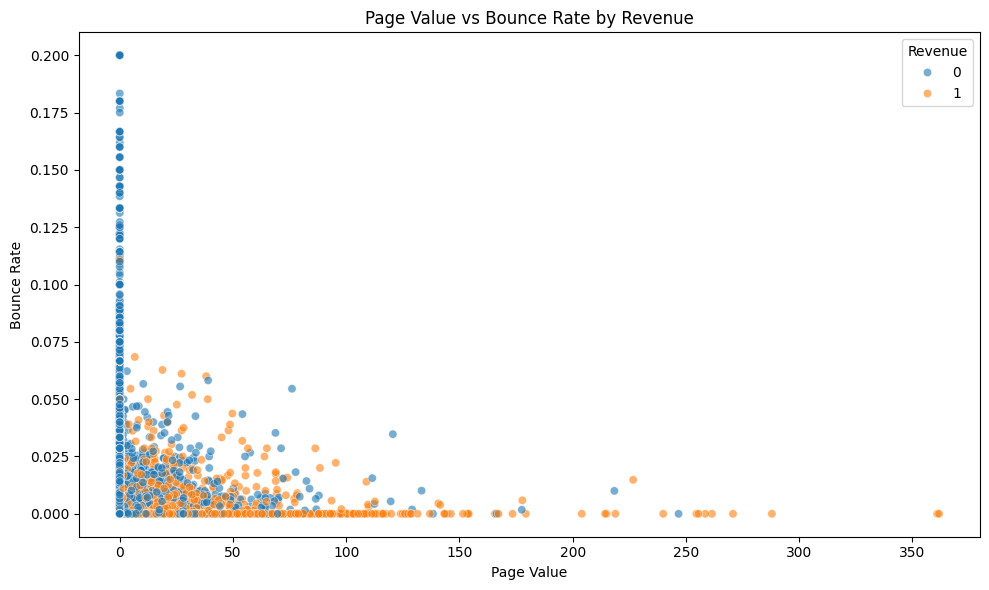

In [34]:
# Re-run visualization pipeline using correct column names

# Encode categorical variables (excluding Revenue for now)
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Encode the target (Revenue)
df_encoded['Revenue'] = df_encoded['Revenue'].astype(int)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()
plt.close()

# Prepare data for clustering
behavioral_features = ['PageValues', 'BounceRates', 'ExitRates', 'ProductRelated_Duration',
                       'Administrative_Duration', 'Informational_Duration', 'SpecialDay']
X = df_encoded[behavioral_features].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster countplot vs Revenue
plt.figure(figsize=(8, 5))
sns.countplot(data=df_encoded, x='Cluster', hue='Revenue')
plt.title("Revenue Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Session Count")
plt.legend(title="Revenue")
plt.tight_layout()
plt.show()
plt.close()

# Page Value vs Bounce Rate by Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='PageValues', y='BounceRates', hue='Revenue', alpha=0.6)
plt.title("Page Value vs Bounce Rate by Revenue")
plt.xlabel("Page Value")
plt.ylabel("Bounce Rate")
plt.legend(title="Revenue")
plt.tight_layout()
plt.show()
plt.close()



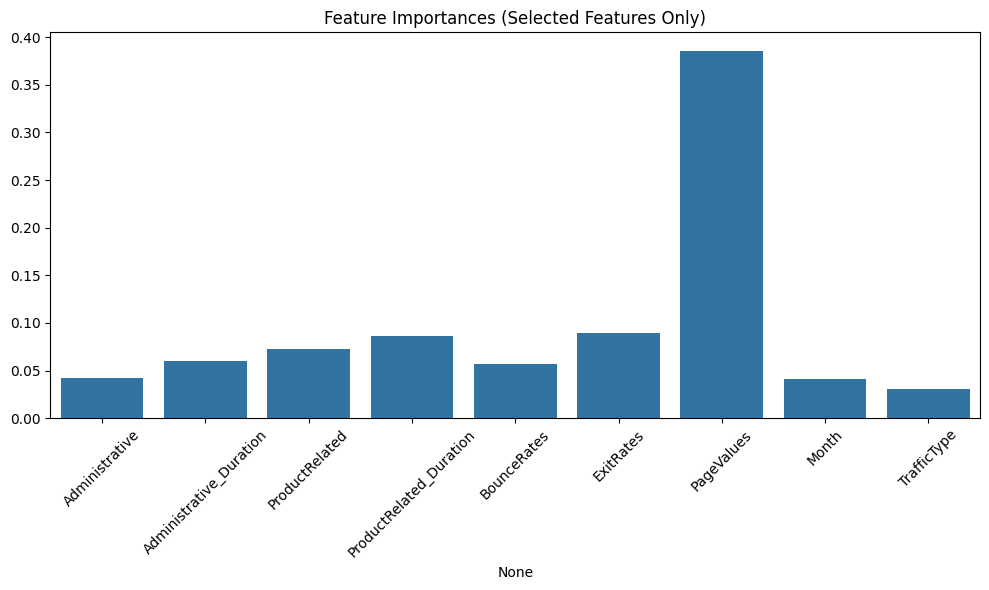

In [39]:
# Final consolidated Python code for Task 2.3 – Innovative Technique
# Load the dataset
df = pd.read_csv("/Users/baonguyen/Documents/Study/RMIT/COSC3126-Data-Mining/Assignment_Group/Assignment-3-Specification-5/data/online_shoppers_intention.csv")

# Encode categorical variables
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Encode target
df_encoded['Revenue'] = df_encoded['Revenue'].astype(int)

# Features and target
X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Innovative techniques
# Step 1: Feature Selection using Random Forest
# Explanation:
# This uses Random Forest as a feature selection wrapper.
# It selects features with importance above the median, reducing dimensionality while preserving predictive power.
# This improves computational efficiency and avoids overfitting.
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_train, y_train)
feature_selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)
selected_features = X.columns[feature_selector.get_support()]

# Step 2: Hybrid Ensemble Model (Voting Classifier)
# Explanation:
# Combines three diverse models:
# Tree-based (Random Forest)
# Linear (Logistic Regression)
# Non-linear (Neural Network)
# Uses soft voting, averaging probabilities across models.
# This increases robustness, accuracy, and generalization — especially valuable in imbalanced datasets like this one.
clf1 = RandomForestClassifier(random_state=42)
clf2 = LogisticRegression(max_iter=1000)
clf3 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)

ensemble = VotingClassifier(estimators=[
    ('rf', clf1), ('lr', clf2), ('mlp', clf3)
], voting='soft')

# Train and evaluate
ensemble.fit(X_train_selected, y_train)
y_pred = ensemble.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 3: Visualize Feature Importances
# Explanation:
# Shows which features the model relies on, reinforcing why selection worked.
# Useful in explaining decisions and communicating insights (especially when used in real-world deployment).
importances = rf_selector.feature_importances_
selected_importances = [importances[i] for i, flag in enumerate(feature_selector.get_support()) if flag]

plt.figure(figsize=(10, 6))
sns.barplot(x=selected_features, y=selected_importances)
plt.title("Feature Importances (Selected Features Only)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()


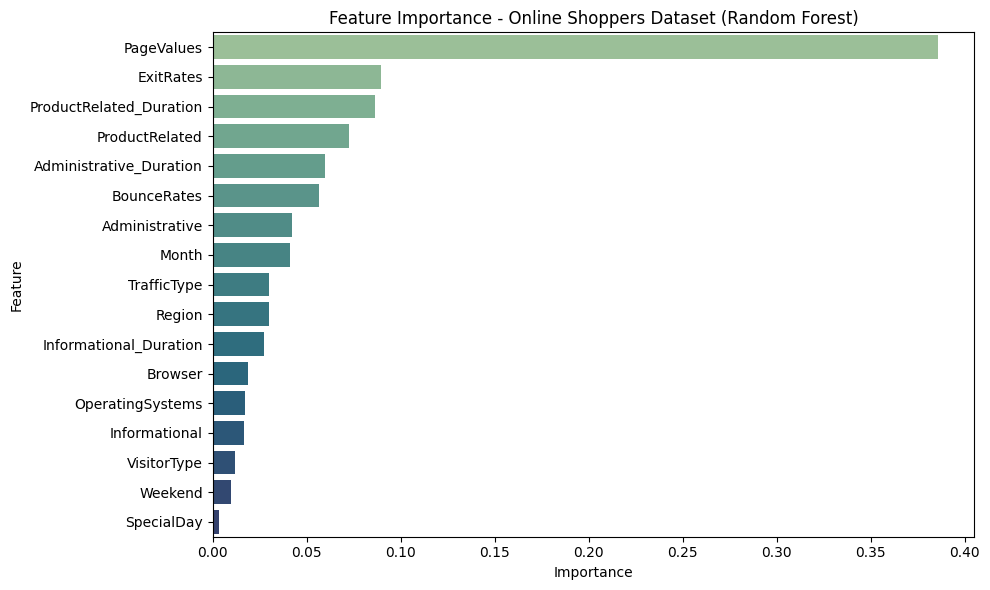

In [51]:
# Re-run code after environment reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df_online = pd.read_csv("/Users/baonguyen/Documents/Study/RMIT/COSC3126-Data-Mining/Assignment_Group/Assignment-3-Specification-5/data/online_shoppers_intention.csv")

# Encode categorical variables
cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
df_encoded = df_online.copy()
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Prepare features and target
X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='crest')
plt.title("Feature Importance - Online Shoppers Dataset (Random Forest)")
plt.tight_layout()
plt.show()
plt.close()